# TF2 심층신경망 모델 - Fashion MNIST (실습)

Fully Connected Layer (Dense)를 활용한 이미지 분류 (Image Classification)

## 확인

1. GPU 옵션 켜져 있는지 확인할 것!!! (수정 - 노트설정 - 하드웨어설정 (GPU))

## 순서

1. **import**: 필요한 모듈 import
2. **전처리**: 학습에 필요한 데이터 전처리를 수행합니다.
3. **모델링(model)**: 모델을 정의합니다.
4. **컴파일(compile)**: 모델을 생성합니다.
5. **학습 (fit)**: 모델을 학습시킵니다.

## 문제

Fashion MNIST 데이터 셋에 대한 분류기 생성
테스트는 10 개의 클래스를 분류 할 것으로 예상하고

입력 모양은 Fashion MNIST 데이터 세트의 기본 크기 여야합니다.28x28 단색. 

데이터 크기를 조정하지 마십시오. input_shape는
(28,28)을 입력 모양으로 만 사용합니다. 

------------------------------------

# 실습

## STEP 1. import

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

## STEP 2. 전처리 (pre-processing)

**tf.keras.datasets** 에는 다양한 샘플 데이터를 제공해줍니다.


[tf.keras.datasets](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

* **fashion_mnist**: Fashion-MNIST 옷(패션) 데이터 셋

* **mnist**: MNIST 손글씨 데이터 셋

데이터 셋을 **로드** 합니다. (mnist)

[코드]

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

데이터 셋 로드: 
* **mnist.load_data()**
* **fashion_mnist.load_data()**

데이터 셋을 불러와, train / validation 세트를 구성합니다.

[코드] 

In [11]:
(x_train, y_train), (x_valid, y_valid) = fashion_mnist.load_data()

정상적으로 로드되었는지, **확인**합니다. 

In [5]:
x_train.shape, x_valid.shape

((60000, 28, 28), (10000, 28, 28))

In [6]:
y_train.shape, y_valid.shape

((60000,), (10000,))

**데이터셋 시각화**

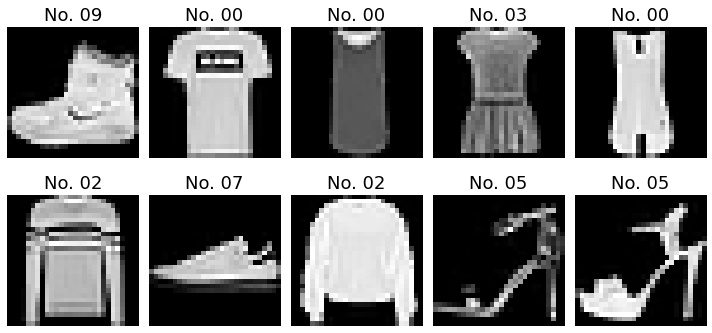

In [7]:
fig, axes = plt.subplots(2, 5)
fig.set_size_inches(10, 5)

for i in range(10):
    axes[i//5, i%5].imshow(x_train[i], cmap='gray')
    axes[i//5, i%5].set_title('No. %02d' % y_train[i], fontsize=18)
    plt.setp( axes[i//5, i%5].get_xticklabels(), visible=False)
    plt.setp( axes[i//5, i%5].get_yticklabels(), visible=False)
    axes[i//5, i%5].axis('off')

plt.tight_layout()
plt.show()

**이미지 정규화 (Normalization)**

* 모든 이미지 픽셀(pixel)값들을 0~1 사이의 값으로 정규화 해 줍니다.
* x_train, x_valid 에 대해서만 정규화합니다.

정규화(Normalization) 전의 최소값(min), 최대값(max)을 확인합니다.

In [12]:
x_train.min(), x_train.max()

(0, 255)

[코드]

In [13]:
x_train = x_train / 255
x_valid = x_valid / 255

정규화 후 최소값/최대값 확인

In [14]:
x_train.min(), x_train.max()

(0.0, 1.0)

## STEP 3. 모델 정의 (Sequential)

이제 Modeling을 할 차례입니다.

`Sequential` 모델 안에서 층을 깊게 쌓아 올려 주면 됩니다.

1. Dense 레이어는 2D 형태의 데이터를 받아들이지 못합니다. Flatten 레이어로 2D -> 1D로 변환해주세요
2. 깊은 출력층과 더 많은 Layer를 쌓습니다.
3. Dense Layer에 `activation='relu'`를 적용합니다.
4. 분류(Classification)의 마지막 층의 출력 숫자는 분류하고자 하는 클래스 갯수와 **같아야** 합니다.


[코드]

In [17]:
model = Sequential([
    # Flatten으로 shape 펼치기, input_shape는 (28, 28)로 지정합니다.
  Flatten(input_shape=(28,28)),
    # Dense Layer
  Dense(1024, activation='relu'),
  Dense(512, activation='relu'),
  Dense(256, activation='relu'),
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation='relu'),
  Dense(16, activation='relu'),
    # Classification을 위한 Softmax 
    # 출력층의 갯수는 클래스의 갯수와 동일하게 맞춰줍니다 (10개), activation도 잊지마세요!
  Dense(10, activation='softmax'),
])

모델에 대한 **요약**을 확인합니다.

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 1024)              803840    
                                                                 
 dense_7 (Dense)             (None, 512)               524800    
                                                                 
 dense_8 (Dense)             (None, 256)               131328    
                                                                 
 dense_9 (Dense)             (None, 128)               32896     
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)               

## STEP 4. 컴파일 (compile)

1. `optimizer`는 가장 최적화가 잘되는 알고리즘인 'adam'을 사용합니다.
2. `loss`는 무엇을 지정하면 좋을까요? (`categorical_crossentropy` / `sparse_categorical_crossentropy`)
3. `metrics`를 'acc' 혹은 'accuracy'로 지정하면, 학습시 정확도를 모니터링 할 수 있습니다.

[코드]

In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

## STEP 5. ModelCheckpoint

`val_loss` 기준으로 epoch 마다 최적의 모델을 저장하기 위하여, ModelCheckpoint를 만듭니다.
* `checkpoint_path`는 모델이 저장될 파일 명을 설정합니다.
* `ModelCheckpoint`을 선언하고, 적절한 옵션 값을 지정합니다.

[코드]

In [20]:
checkpoint_path = "lab_cp.ckpt"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

## STEP 6. 학습 (fit)

1. `validation_data`를 반드시 지정합니다.
2. `epochs`을 적절하게 지정합니다.
3. `callbacks`에 바로 위에서 만든 checkpoint를 지정합니다.

[코드]

In [21]:
history = model.fit(x_train, y_train,
                    validation_data=(x_valid, y_valid),
                    epochs=20,
                    callbacks=[checkpoint],
                   )

Epoch 1/20
1869/1875 [============================>.] - ETA: 0s - loss: 0.5479 - acc: 0.8029
Epoch 1: val_loss improved from inf to 0.43711, saving model to lab_cp.ckpt
1875/1875 [==============================] - 11s 4ms/step - loss: 0.5475 - acc: 0.8030 - val_loss: 0.4371 - val_acc: 0.8437
Epoch 2/20
1860/1875 [============================>.] - ETA: 0s - loss: 0.3959 - acc: 0.8595
Epoch 2: val_loss improved from 0.43711 to 0.41844, saving model to lab_cp.ckpt
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3962 - acc: 0.8592 - val_loss: 0.4184 - val_acc: 0.8489
Epoch 3/20
1865/1875 [============================>.] - ETA: 0s - loss: 0.3553 - acc: 0.8721
Epoch 3: val_loss improved from 0.41844 to 0.36833, saving model to lab_cp.ckpt
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3550 - acc: 0.8723 - val_loss: 0.3683 - val_acc: 0.8659
Epoch 4/20
1859/1875 [============================>.] - ETA: 0s - loss: 0.3280 - acc: 0.8816
Epoch 4: val_loss did 

## STEP 7. 학습 완료 후 Load Weights (ModelCheckpoint)

학습이 완료된 후에는 반드시 `load_weights`를 해주어야 합니다.

그렇지 않으면, 열심히 ModelCheckpoint를 만든 의미가 없습니다.

[코드]

In [22]:
# checkpoint 를 저장한 파일명을 입력합니다.
model.load_weights(checkpoint_path)
model.evaluate(x_valid, y_valid)



313/313 [==============================] - 1s 3ms/step - loss: 0.3283 - acc: 0.8873


[0.3283005356788635, 0.8873000144958496]

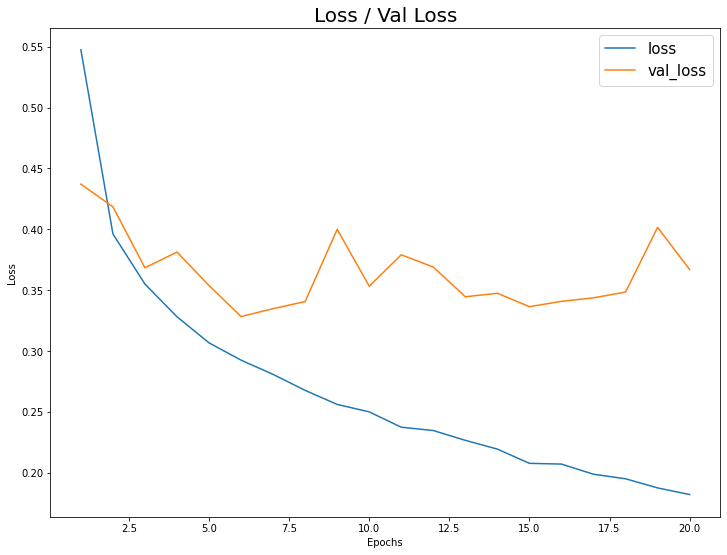

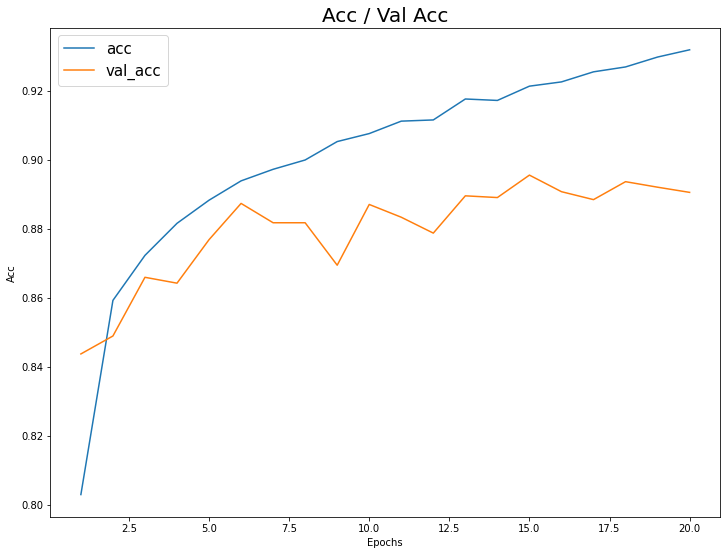

In [23]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['loss'])
plt.plot(np.arange(1, 21), history.history['val_loss'])
plt.title('Loss / Val Loss', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['loss', 'val_loss'], fontsize=15)
plt.show()

plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 21), history.history['acc'])
plt.plot(np.arange(1, 21), history.history['val_acc'])
plt.title('Acc / Val Acc', fontsize=20)
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'], fontsize=15)
plt.show()